In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Diyabet veri setini yükleyelim
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
# Sadece bir özniteliği kullanalım
diabetes_X = diabetes_X[:, np.newaxis, 2]
# np.newaxis ifadesi, yeni bir boyut eklemek için numpy kütüphanesinin özel bir nesnesini temsil eder. 
# Bu durumda, bu ifade kullanılarak bir boyut ekleyebiliriz.
# 2 indeksi, diabetex_X dizisinin üçüncü boyutunu seçer.

In [4]:
# Veriyi eğitim ve test şeklinde ayrıştıralım
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [6]:
# Çıktı değerlerini de eğitim ve test şeklinde ayrıştıralım
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [7]:
# Doğrusal regresyon nesnesi oluşturalım
lr = linear_model.LinearRegression()

In [8]:
# Eğitim verisi ile modeli eğitelim
lr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [9]:
# Test verisini kullanarak kestirim işlemini gerçekleştirelim
tahmin = lr.predict(diabetes_X_test)

In [10]:
# Katsayıları hesaplayalım
lr.coef_

array([938.23786125])

In [11]:
# Ortalama kare hata'yı hesaplayalım
mean_squared_error(diabetes_y_test, tahmin)

2548.07239872597

In [12]:
# Belirleme katsayısını hesaplayalım: Mükemmel kestirim için 1 değeri alır
r2_score(diabetes_y_test, tahmin)

0.47257544798227147

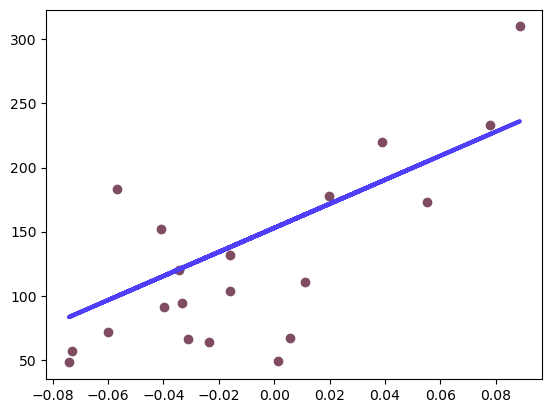

In [13]:
# Çıktıları çizdirelim
plt.scatter(diabetes_X_test, diabetes_y_test, color="#7e4c63")
plt.plot(diabetes_X_test, tahmin, linewidth = 3, color="#503ff8")
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [15]:
# Örnek veri oluşturalım
X = np.sort(5 * np.random.rand(40, 1), axis = 0)
# np.random.rand(40, 1) ifadesi, 0 ile 1 arasında rastgele sayılardan oluşan 40 satır ve 1 sütundan oluşan bir dizi oluşturur.
# np.sort(5 * np.random.rand(40, 1), axis=0) ifadesi, oluşturulan diziyi sütun bazında sıralar. 
# Yani, her sütunun içindeki değerler küçükten büyüğe doğru sıralanır.

y = np.sin(X).ravel()
# ravel() işlevi, y dizisini düzleştirir. Yani, çok boyutlu bir diziyi tek boyutlu hale getirir.

In [20]:
# Çıktı değerlere gürültü ekleyelim
y[::5] += 3 * (0.5 - np.random.rand(8))

In [21]:
# Regresyon modellerini eğitelim
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
# C=100 parametresi, SVR modelinin ceza parametresini belirtir. 
# Gamma parametresi, çekirdek fonksiyonunun ne kadar esnek olacağını kontrol eder.
# Daha büyük bir gamma değeri, modelin daha karmaşık desenlere uyum sağlama eğiliminde olmasını sağlar.
# epsilon=0.1 parametresi, eşik değeri (tolerans) parametresini belirtir.

svr_lin = SVR(kernel="linear", C=100, gamma="auto", epsilon=0.1)

svr_poly = SVR(kernel="poly", C=100, gamma="auto", epsilon=0.1, degree=3, coef0=1)
# "auto" değeri, gamma parametresinin otomatik olarak hesaplanmasını sağlar.
# coef0=1 parametresi, polinom çekirdeği için ekstra bir sabit terimi belirtir.

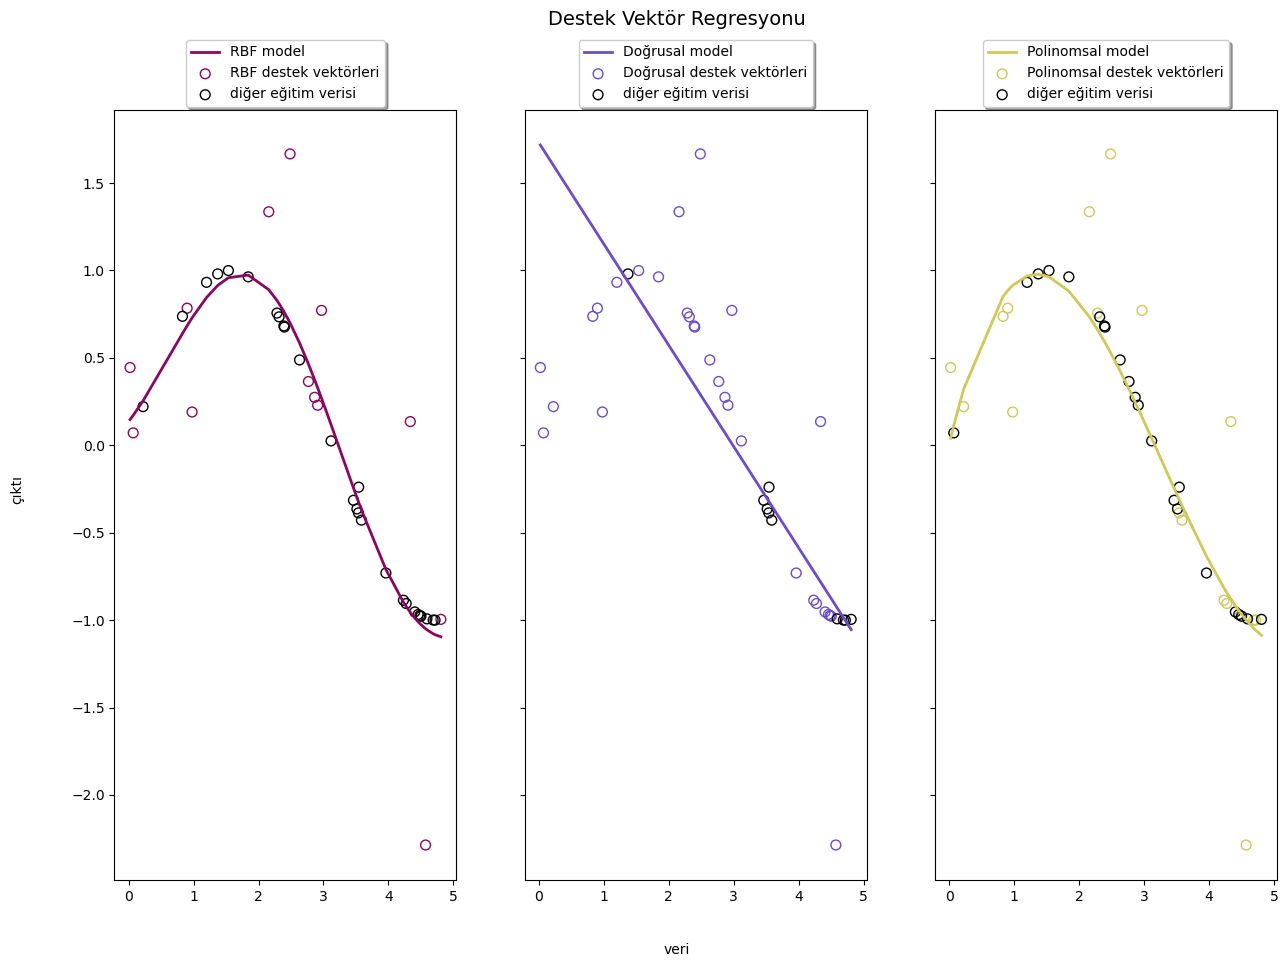

In [22]:
# Sonuçları inceleyelim
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Doğrusal", "Polinomsal"]
model_color = ["#90045f", "#6c4bd3", "#cfc955"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X,y).predict(X),
                  color=model_color[ix],
                  lw=lw,
                  label="{} model".format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_],
                     facecolor="none",
                     edgecolor=model_color[ix],
                     s=50,
                     label="{} destek vektörleri".format(kernel_label[ix]))
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="diğer eğitim verisi",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "veri", ha="center", va="center")
fig.text(0.06, 0.5, "çıktı", ha="center", va="center", rotation="vertical")
fig.suptitle("Destek Vektör Regresyonu", fontsize=14)
plt.show()